# Importing libraries and loading + getting basic information about the dataset

## Imoporting libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('synthetic_commute_data.csv')

## Getting basic information about the dataset

In [3]:
df.head()

,Age,Gender,Major,Distance (km),Mode of Transportation,Traffic,Commute Time (min)
0,28,Male,NaN,12.1,Bus,High,181.5
1,20,Female,EEE,4.0,Bus,High,60.0
2,21,Female,CSE,10.2,Car,Medium,102.0
3,30,Male,Business,7.8,Bus,Medium,93.6
4,19,Male,EEE,12.9,Car,Low,90.3


In [4]:
df.columns

Index(['Age', 'Gender', 'Major', 'Distance (km)', 'Mode of Transportation',
       'Traffic', 'Commute Time (min)'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     139 non-null    int64  
 1   gender                  127 non-null    object 
 2   major                   125 non-null    object 
 3   distance_(km)           139 non-null    float64
 4   mode_of_transportation  129 non-null    object 
 5   traffic                 139 non-null    object 
 6   commute_time_(min)      139 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.7+ KB


Missing Data Count: 
age                        0
gender                    12
major                     14
distance_(km)              0
mode_of_transportation    10
traffic                    0
commute_time_(min)         0
dtype: int64


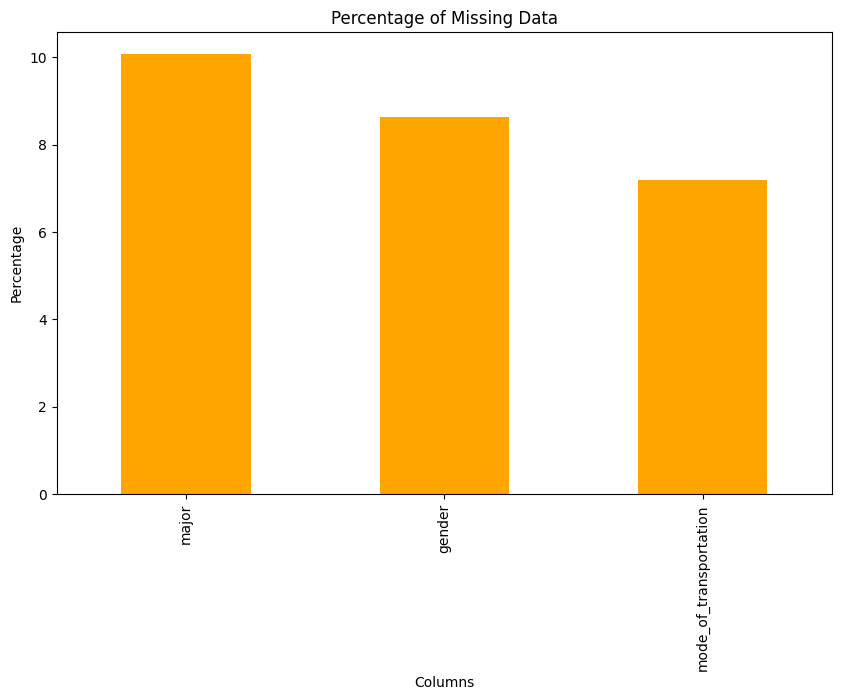

In [6]:
print("Missing Data Count: ")
print(df.isnull().sum())
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Data")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


Looks like there are some missing values in the dataset. We will handle the missing values in the next section.

# Data Processing

## Handling missing values

In [7]:
categorical_columns = ['major','gender']

def update_missing_transportation(df):
    df.loc[df['mode_of_transportation'].isnull() & (df['distance_(km)'] <= 1.5), 'mode_of_transportation'] = 'Walk'
    df.loc[df['mode_of_transportation'].isnull() & (df['distance_(km)'] > 1.5) & (df['distance_(km)'] <= 2), 'mode_of_transportation'] = 'Rickshaw'
    df.loc[df['mode_of_transportation'].isnull() & (df['distance_(km)'] > 2), 'mode_of_transportation'] = 'Bus'
    return df

df = update_missing_transportation(df)
df['mode_of_transportation'] = df['mode_of_transportation'].str.lower()
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

There are 3 columns which have missing values. The major and gender columns are categorical and can be filled with the mode value of their respective columns. But for mode_of_transportation the imputation function written with general logic about the domain. 

In [8]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 1
Number of duplicate rows: 0


There is one duplicate row so it is dropped.

# Univariate Analysis

In [9]:
# Age distribution
fig = px.histogram(df, x='age', nbins=10, title='Age Distribution', color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis_title='Age', yaxis_title='Count',bargap=0.1)
fig.show()


The age column ranges from age 18 to 31. One thing to note is that most of the people present in the age column are of 24-25 age group with a count of 35. The second highest age group is 28-29 with a count of 24 people in it. People with lowest count is the age group 30-31 with a count of 4. Other age groups have people ranging from 17 to 20.

In [10]:
# Gender Distribution: Pie Chart
fig = px.pie(df, names='gender', title='Gender Distribution', color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

It is seen from the pie chart that there are more males than females in the dataset. 61.6% of the total data are of males.

In [11]:
# Major Distribution: Bar Chart
fig = px.bar(df['major'].value_counts().reset_index(), x='major', y='count',
             color='major', title='Distribution of Students by Major', labels={'count': 'Count', 'major': 'Major'})
fig.show()


Majority of people present in the dataset have CSE as their major with a count of 58 followed by EEE(33) and Business(26). The least people belong to the Engineering major which has a count of 21.

In [12]:
# Distance Distribution: Histogram
fig = px.histogram(df, x='distance_(km)', nbins=10, title='Distance Distribution (in km)', 
                   color_discrete_sequence=['lightgreen'])
fig.update_layout(xaxis_title='Distance (km)', yaxis_title='Frequency', bargap=0.1)
fig.show()


This histogram gives a very interesting insight about the  distance distribution in the dataset. Most of the people in the dataset live from 4 to 12 kilometers distance from their office location, specifically in distance 6-8 kilometers with a count of 29. Second highest group of people in the dataset belong to 10-12 kilometers distance from their office location with a count of 27. There are very less amount of people in the dataset whole live too much far away from their office location(12-18 kilometers). Only one person lies in the group 16-18 kilometers group.

In [13]:
# Mode of Transportation: Bar Chart
mode_counts = df['mode_of_transportation'].value_counts().reset_index()
mode_counts.columns = ['mode_of_transportation', 'count']

fig = px.bar(mode_counts, 
             x='mode_of_transportation', 
             y='count', 
             color='mode_of_transportation', 
             title='Mode of Transportation Distribution', 
             labels={'mode_of_transportation': 'Mode of Transportation', 'count': 'Count'})
fig.show()

Most people use bus as their primary mode of transportation. In the bar plot it is seen that people using bus as their primary mode of transportation has count of 64. Car has 2nd position here with a count of 58. People using rickshaw and taking walk are of same count 8.

In [14]:
# Traffic Conditions: Bar Chart
mode_counts = df['traffic'].value_counts().reset_index()
mode_counts.columns = ['traffic', 'count']
fig = px.bar(mode_counts, x='traffic', y='count', 
             color='traffic', title='Traffic Conditions Distribution', labels={'index': 'Traffic', 'traffic': 'Count'})
fig.show()


Very surprising that each class of the traffic condition has exactly same number of count which is 46 in this case. Here it means that the classes are balanced.

In [15]:
# Commute Time: Histogram
fig = px.histogram(df, x='commute_time_(min)', nbins=12, title='Commute Time Distribution',
                   color_discrete_sequence=['coral'])
fig.update_layout(xaxis_title='Commute Time (minutes)', yaxis_title='Frequency',bargap=0.1)
fig.show()

The commute time has a very large range of values. IT is seen from the plot that for most of the people(27) it takes 60-79.9 minutes travel from and to office-home. if i consider cumulative time then 0-120 minutes is the range of time that most of the people have. there aren't a lot of people who have time >120 minutes.

# Bivariate Analysis

In [16]:
# Commute Time vs Distance Scatter Plot
fig = px.scatter(df, x='distance_(km)', y='commute_time_(min)', color='traffic',
                 title='Commute Time vs Distance (by Traffic Conditions)',
                 labels={'distance_(km)': 'Distance (km)', 'commute_time_(min)': 'Commute Time (minutes)'},
                 hover_data=['mode_of_transportation'])
fig.show()


It is clearly seen from the scatter plot that low traffic causes less commute time but high traffic causes more commute time.Records with medium traffic intensity has commute time somewhere between the high and low traffic. 

In [17]:
# Box Plot: Commute Time by Mode of Transportation
fig = px.box(df, x='mode_of_transportation', y='commute_time_(min)', 
             color='mode_of_transportation', title='Commute Time by Mode of Transportation',
             labels={'commute_time_(min)': 'Commute Time (minutes)'})
fig.show()

People who use bus as their mode of transport has highest median of commute time(92.4 minutes). and people who walk to their office have lowest valueof median  which is 14 minutes. 2nd lowest value of median occurs in the rickshaw mode of transport whuch has median of 21. Car has 2nd highest value of median which is 80.15 minutes. It can be infered that people who uses car and bus takes more time to commute in general.

In [18]:
# Box Plot: Commute Time by Traffic Conditions
fig = px.box(df, x='traffic', y='commute_time_(min)', color='traffic', 
             title='Commute Time by Traffic Conditions',
             labels={'commute_time_(min)': 'Commute Time (minutes)', 'traffic': 'Traffic Conditions'})
fig.show()


It was also visualized in the scatter plot above but this shows the speicfic values of median for each traffic condition. People who encounter high traffic conditions has a mean time of 116.55 minutes followed by medium(91.6 minutes) and low(48.65 minutes). This shows that traffic conditions have a impact on the commute time and it is clearly visible.

In [19]:
# Pairwise Relationships (Numerical Features)
numerical_cols = ['age', 'distance_(km)', 'commute_time_(min)']
fig = px.scatter_matrix(df, dimensions=numerical_cols, color='traffic', title='Pairwise Relationships Between Numerical Features')
fig.show()

It is clear that high traffic has more commute time in general.

# Multivariate Analysis

In [20]:
# Group by major and mode of transportation
grouped_data = df.groupby(['major', 'mode_of_transportation'])['commute_time_(min)'].mean().reset_index()

# Grouped bar chart
fig = px.bar(grouped_data, 
             x='major', 
             y='commute_time_(min)', 
             color='mode_of_transportation',
             barmode='group',
             title='Average Commute Time by Major and Mode of Transportation')
fig.show()


people from all majors use mostly bus as their transportation mode except for engineering majors who uses car mostly for their mode of transport.

In [21]:
# Group by major and gender and calculate mean commute time
grouped_major_gender = df.groupby(['major', 'gender'])['commute_time_(min)'].mean().reset_index()
fig = px.bar(grouped_major_gender, 
             x='major', 
             y='commute_time_(min)', 
             color='gender',
             barmode='group',
             title='Average Commute Time by Major and Gender')
fig.show()


people from business who are female has lesser commute time than men. again, this analysis is also true for the people of cse majors. on the other hand, females of eee and engineering majors have mor commute time than men. All values aof commute time doesnt differ too much significantly except for business class.

In [22]:
# Group by major and calculate total commute time
grouped_major_time = df.groupby('major')['commute_time_(min)'].mean().reset_index()
fig = px.bar(grouped_major_time, 
             x='major', 
             y='commute_time_(min)',
             title='Average Commute Time by Major',
             color='commute_time_(min)',
             color_continuous_scale='Viridis')
fig.show()

people from all majors have close average mean commute time but for business majors the time is much lower than other majors.

In [23]:
# Grouped Bar Chart: Commute Time by Mode of Transportation and Traffic
fig = px.bar(df, x='mode_of_transportation', y='commute_time_(min)', color='traffic',
             barmode='group', title='Commute Time by Mode of Transportation and Traffic Conditions',
             labels={'commute_time_(min)': 'Commute Time (minutes)', 'mode_of_transportation': 'Mode of Transportation'})
fig.show()


People who walk to their office arent affected by traffic conditions. they always get low traffic. on the other hand, people who take bus,car  has significant total commute time than people who take rickshaw and walk to their office. but the total time of bus in all cases expect for low(just by a small margin behind from car) is more every other mode of transportation. 

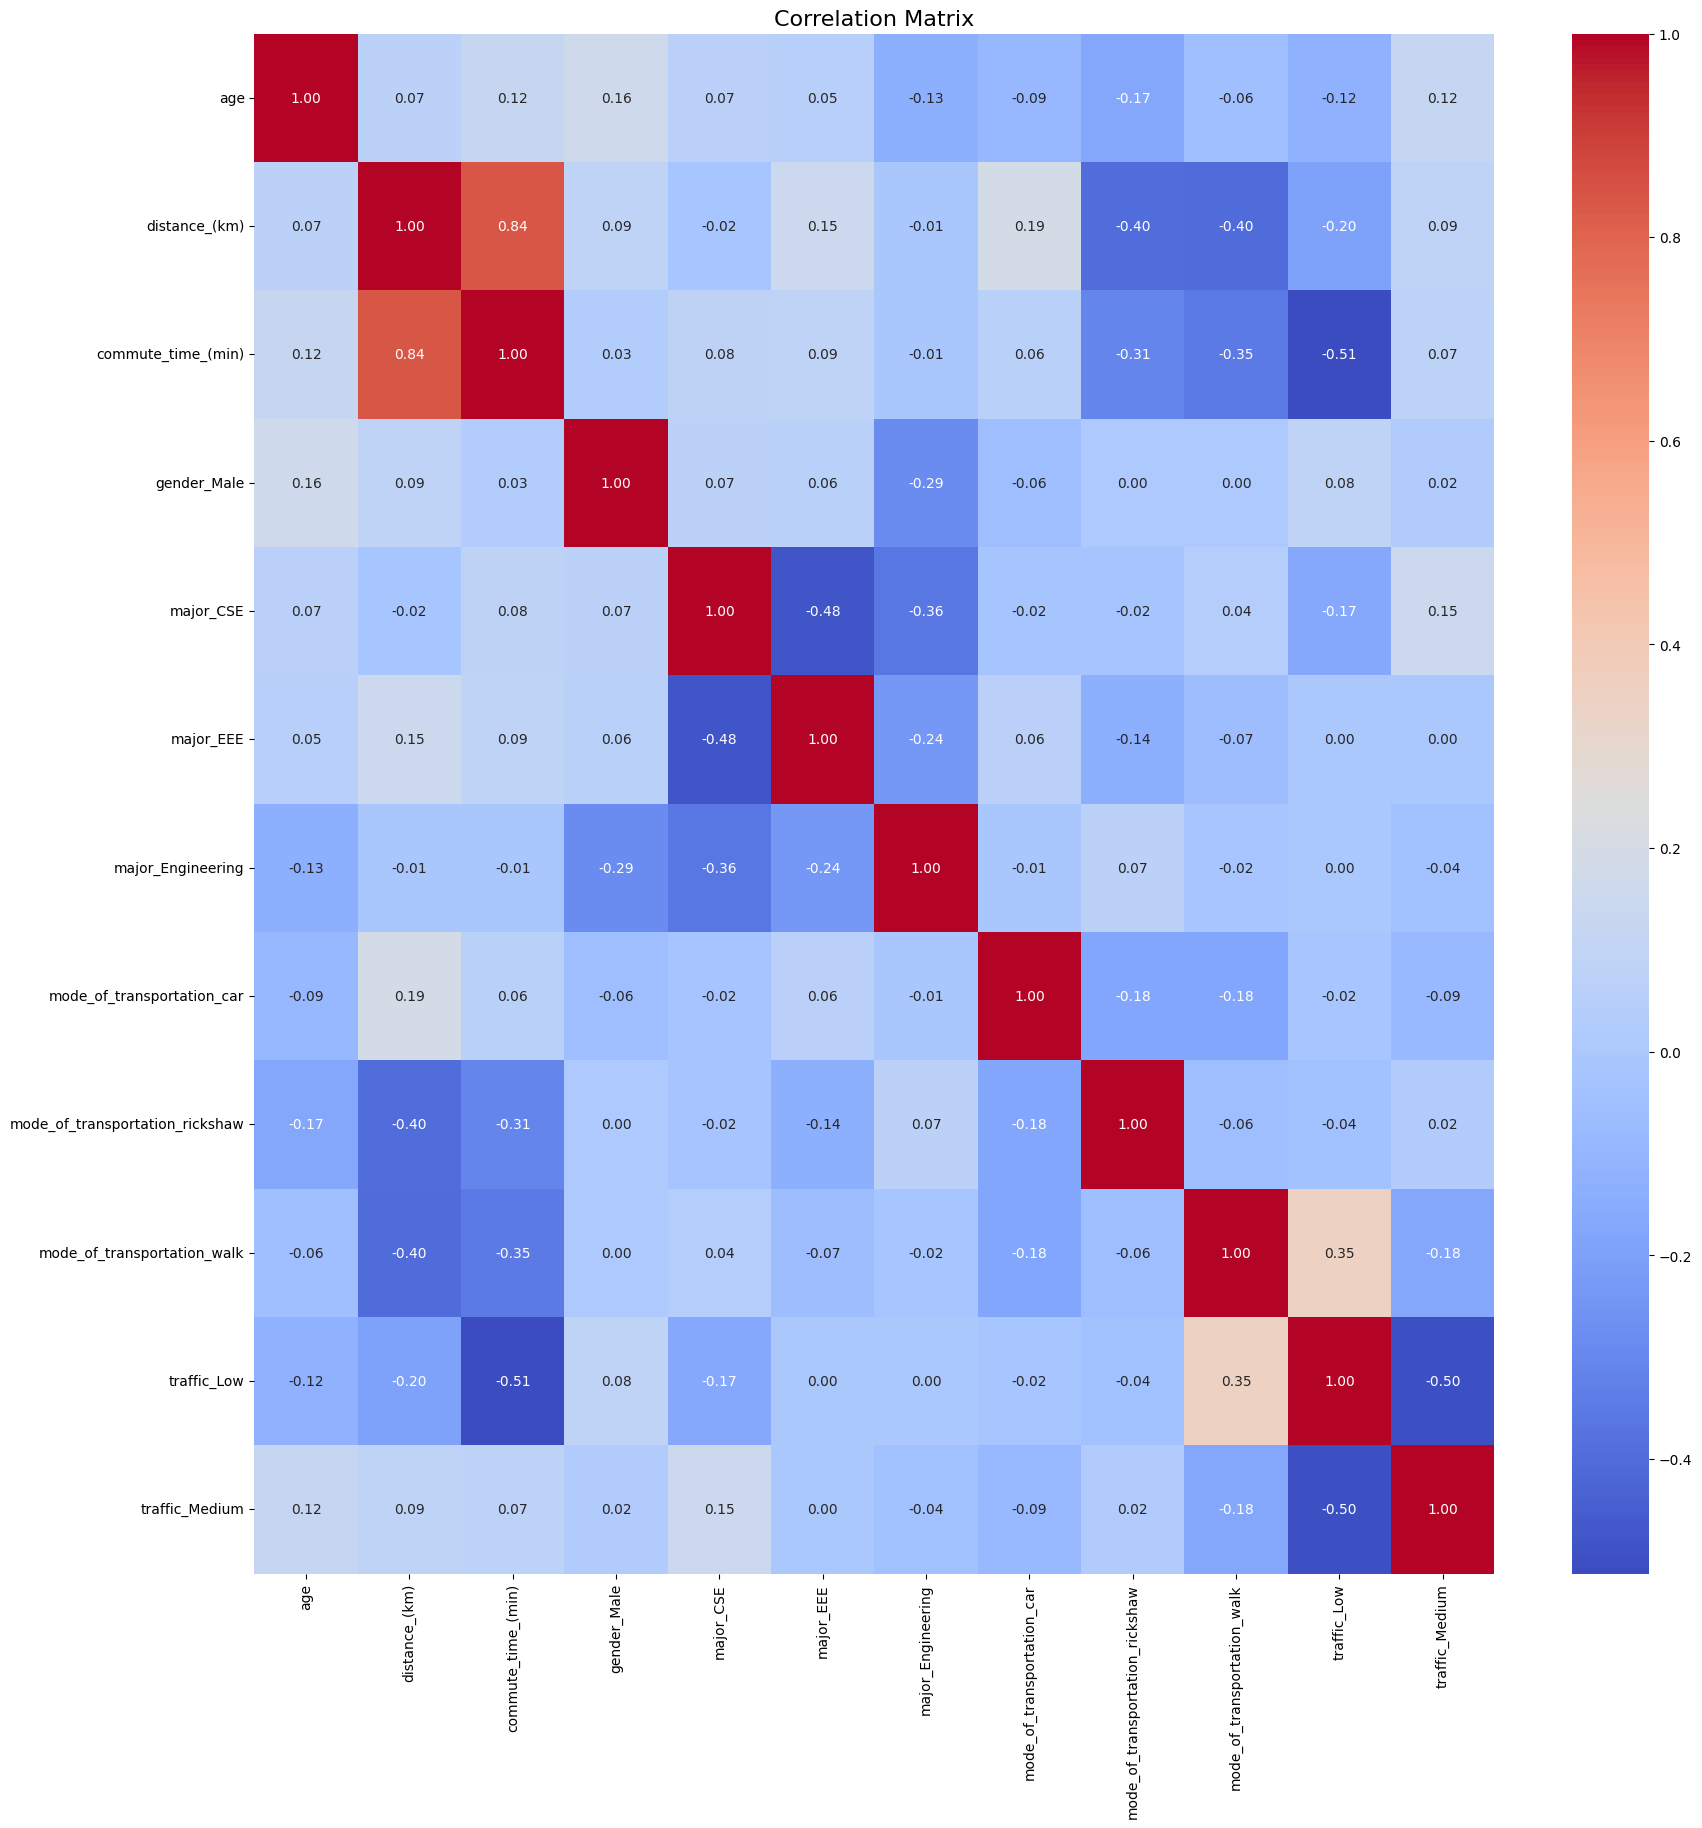

In [24]:
# Encode Categorical Variables
plt.figure(figsize=(20,20))
encoded_df = pd.get_dummies(df, columns=['gender', 'major', 'mode_of_transportation', 'traffic'], drop_first=True)
sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [25]:
encoded_df.corr()['commute_time_(min)'].sort_values(ascending=False)

commute_time_(min)                 1.000000
distance_(km)                      0.837396
age                                0.123790
major_EEE                          0.088875
major_CSE                          0.084101
traffic_Medium                     0.073104
mode_of_transportation_car         0.055924
gender_Male                        0.027934
major_Engineering                 -0.006235
mode_of_transportation_rickshaw   -0.308677
mode_of_transportation_walk       -0.347923
traffic_Low                       -0.512630
Name: commute_time_(min), dtype: float64

- Key Correlations Involving commute_time_(min):
  - commute_time_(min) ↔ distance_(km) (0.837): Strong positive correlation: Longer distances directly increase commute time.
  - commute_time_(min) ↔ traffic_Medium (-0.512):Moderate negative correlation: Commute time tends to decrease in medium traffic compared to other traffic levels.
  - commute_time_(min) ↔ mode_of_transportation_walk (-0.348):Moderate negative correlation: Students who walk have shorter commute times, likely due to proximity to campus.
  - commute_time_(min) ↔ mode_of_transportation_rickshaw (-0.309):Weak-to-moderate negative correlation: Students using rickshaws also have shorter commute times compared to other modes.
- Multicollinearity: Majors (CSE, EEE, Engineering): negative correlations; they represent mutually exclusive categories.



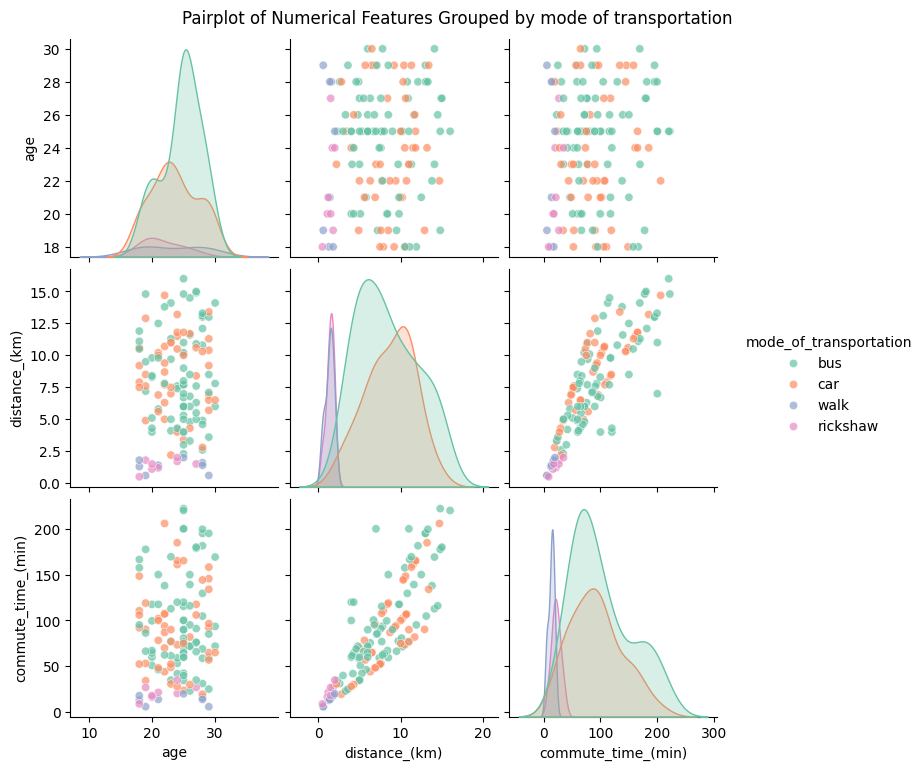

In [26]:
numerical_columns = ['age', 'distance_(km)', 'commute_time_(min)']
sns.pairplot(df, 
             hue='mode_of_transportation', 
             vars=numerical_columns,
             palette='Set2',  
             plot_kws={'alpha': 0.7})

plt.suptitle('Pairplot of Numerical Features Grouped by mode of transportation', y=1.02)
plt.show()


It is more clear that distance is the factor which can be used to to separate commute time based upon on the mode of transportation. i.e. distance and mode of transportation are related and they also relate to the commute time.

# Summary of Findings and Analysis Insights

1. **Traffic and Commute Time:** High traffic conditions lead to significantly increased commute times, while low traffic significantly reduces it.
2. **Mode of Transportation:** Majorly, people use buses and cars, with buses causing the highest commute time while walking results in the shortest.
3. **Distance & Commute Correlation:** Distance directly influences commute time; larger distances consistently result in higher commute times.
4. **Major Differences:** Students from business majors have the lowest average commute times compared to others.
5. **Traffic Balance:** Traffic levels are well-balanced in the dataset, without biases among the classes (Low, Medium, High).

# Regression Analysis

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [47]:
features = ['distance_(km)', 'traffic_Low', 'mode_of_transportation_walk', 'mode_of_transportation_rickshaw','age']
target = 'commute_time_(min)'

X = encoded_df[features]
y = encoded_df[target]

In [48]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
def regression_analysis(X_train, X_test, y_train, y_test, models):
    results = []
    coefficients = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Model": model_name,
            "MSE": mse,
            "MAE": mae,
            "R2": r2
        })

    return results, coefficients

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.4),
    #"Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='linear', C=1.0, epsilon=0.2)
}

results, coefficients = regression_analysis(X_train, X_test, y_train, y_test, models)
df_copy=df.copy()
# Identify categorical features
categorical_columns = df_copy.select_dtypes(include=['object']).columns

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for col in categorical_columns:
    df_copy[col] = le.fit_transform(df_copy[col])

#print(df_copy)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_copy.drop("commute_time_(min)",axis=1), df_copy['commute_time_(min)'], test_size=0.2, random_state=42)
dt_reg=DecisionTreeRegressor(max_depth=5, random_state=42)
dt_reg.fit(X_train_cat, y_train_cat)
rf_reg=RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_cat, y_train_cat)


RandomForestRegressor(random_state=42)

In [51]:
y_pred = dt_reg.predict(X_test_cat)

mse = mean_squared_error(y_test_cat, y_pred)
mae = mean_absolute_error(y_test_cat, y_pred)
r2 = r2_score(y_test_cat, y_pred)
results.append({
            "Model": "decision tree regressor",
            "MSE": mse,
            "MAE": mae,
            "R2": r2
        })
y_pred = rf_reg.predict(X_test_cat)

mse = mean_squared_error(y_test_cat, y_pred)
mae = mean_absolute_error(y_test_cat, y_pred)
r2 = r2_score(y_test_cat, y_pred)
results.append({
            "Model": "random forest regressor",
            "MSE": mse,
            "MAE": mae,
            "R2": r2
        })

In [54]:
for result in results:
    print(f"{result['Model']} Metrics:\n  MSE: {result['MSE']:.2f}\n  MAE: {result['MAE']:.2f}\n  R2: {result['R2']:.2f}\n")


Linear Regression Metrics:
  MSE: 694.78
  MAE: 17.33
  R2: 0.78

Ridge Regression Metrics:
  MSE: 701.58
  MAE: 17.37
  R2: 0.77

Lasso Regression Metrics:
  MSE: 693.93
  MAE: 17.27
  R2: 0.78

ElasticNet Regression Metrics:
  MSE: 1007.97
  MAE: 22.80
  R2: 0.68

Support Vector Regressor Metrics:
  MSE: 951.79
  MAE: 20.37
  R2: 0.69

decision tree regressor Metrics:
  MSE: 1547.24
  MAE: 24.68
  R2: 0.50

random forest regressor Metrics:
  MSE: 812.74
  MAE: 16.19
  R2: 0.74



In [33]:
for model_name, coeffs in coefficients.items():
    print(f"{model_name} Coefficients:")
    for feature, value in coeffs.items():
        print(f"  {feature}: {value:.4f}")